<a href="https://colab.research.google.com/github/hoshisuke/-/blob/main/05_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch入門 (1)
参考資料: 
* PyTorch公式のチュートリアル https://pytorch.org/tutorials/index.html

注意:
* ランタイムのタイプをGPUにしておいてください。
  * 上のメニュー「ランタイム」→「ランタイムのタイプを変更」で「GPU」を選択 


## Reproducibility
* 乱数のシードを設定して、実験の再現性を確保する。
 * https://pytorch.org/docs/stable/notes/randomness.html

In [ ]:
import random
import numpy as np
import torch

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

## テンソル

### テンソルの作り方

In [ ]:
# 1で埋められたテンソルを作る
x = torch.ones(2, 5)
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
# 要素のデータ型を確認する
print(x.dtype)

torch.float32


In [ ]:
# 0で埋められたテンソルを作る
x = torch.zeros(4, 4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
# 特定の値で埋められたテンソルを作る
x = torch.full((2, 3), 3.14159)
print(x)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])


In [ ]:
# [0,1)の一様乱数を要素とするテンソルを作る
x = torch.rand(5, 3)
print(x)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939]])


In [ ]:
# Pythonのリストからテンソルを作る
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
# NumPyのndarrayからテンソルを作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)

[1 2 3]
tensor([1, 2, 3])


In [ ]:
# NumPyのndarrayの要素を変更するとどうなるか？
a[0] = -1
print(t)

tensor([-1,  2,  3])


In [ ]:
# テンソルのほうの要素を変更するとどうなるか?
t[1] = -2
print(a)

[-1 -2  3]


In [ ]:
# cloneメソッドを使ってテンソルの複製を作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)
s = t.clone()
print(s)

[1 2 3]
tensor([1, 2, 3])
tensor([1, 2, 3])


In [ ]:
s[0] = -1
print(a)
print(s)

[1 2 3]
tensor([-1,  2,  3])


In [ ]:
a[1] = -2
print(a)
print(s)

[ 1 -2  3]
tensor([-1,  2,  3])


In [ ]:
# テンソルからndarrayを作る
x = torch.ones(3,4)
print(x)
y = x.numpy()
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:
# テンソルを変更するとどうなるか?
x[0,0] = -1
print(x)
print(y)

tensor([[-1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
[[-1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


### テンソルの形状を得る

In [ ]:
x = torch.zeros(5, 3) 
print(x)

print(x.shape)
print(x.size(0))
print(x.size(1))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
5
3


### 既存のテンソルから新たにテンソルを作る

In [ ]:
# 既存のテンソルから形状を引き継いで新たにテンソルを作る
# 要素のデータ型は変更できる
# （randnは正規乱数の意味）
x2 = torch.randn_like(x, dtype=torch.float)
print(x2)

tensor([[ 0.6035,  0.8110, -0.0451],
        [ 0.8797,  1.0482, -0.0445],
        [-0.7229,  2.8663, -0.5655],
        [ 0.1604, -0.0254,  1.0739],
        [ 2.2628, -0.9175, -0.2251]])


### テンソルの要素のデータ型いろいろ

In [ ]:
a = torch.tensor(1)
print(a, a.dtype)

tensor(1) torch.int64


In [ ]:
x = torch.tensor(2.0)
print(x, x.dtype)
y = torch.tensor(2.0, dtype=torch.float64)
print(y, y.dtype)
z = torch.tensor(2.0, dtype=torch.float16)
print(z, z.dtype)


tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64
tensor(2., dtype=torch.float16) torch.float16


In [ ]:
s = x + y + z
print(s.dtype)

torch.float64


In [ ]:
b = torch.tensor(True)
print(b, b.dtype)

tensor(True) torch.bool


### 型の指定(1)

In [ ]:
a = torch.tensor(1, dtype=torch.int32)
print(a, a.dtype)
x = torch.tensor(2.0, dtype=torch.float)
print(x, x.dtype)
z = torch.tensor(2.0, dtype=torch.double)
print(z, z.dtype)

tensor(1, dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64


### 型の指定(2)

In [ ]:
a = torch.IntTensor([1, 2, 3])
print(a, a.dtype)
x = torch.FloatTensor(np.array([2.0, -4.0]))
print(x, x.dtype)
y = torch.DoubleTensor([2.0, -4.0])
print(y, y.dtype)
b = torch.BoolTensor([1, 0, 2, 0])
print(b, b.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([ 2., -4.]) torch.float32
tensor([ 2., -4.], dtype=torch.float64) torch.float64
tensor([ True, False,  True, False]) torch.bool


### 型の変更

In [ ]:
a = torch.tensor([1, 10])
print(a, a.dtype)

x = a.float()
print(x, x.dtype)

tensor([ 1, 10]) torch.int64
tensor([ 1., 10.]) torch.float32


In [ ]:
y = a.type(torch.float64)
print(y, y.dtype)

tensor([ 1., 10.], dtype=torch.float64) torch.float64


In [ ]:
z = a.type_as(x)
print(z, z.dtype)

tensor([ 1., 10.]) torch.float32


### スカラーとベクトル

In [ ]:
s = torch.tensor(1.0)
print(s)
print(s.dim())
print(s.shape)

tensor(1.)
0
torch.Size([])


In [ ]:
v = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(v)
print(v.dim())
print(v.shape)

tensor([1., 2., 3., 4.])
1
torch.Size([4])


In [ ]:
v = torch.tensor([4.0])
print(v)
print(v.dim())
print(v.shape)

tensor([4.])
1
torch.Size([1])


In [ ]:
# 要素がひとつのテンソルから、その要素をスカラ値として取り出す
x = torch.randn(1)
print(x)
print(x.item())

tensor([2.3466])
2.3466382026672363


### 行列

In [ ]:
m = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(m)
print(m.dim())
print(m.shape)
print(m[1, 1])

tensor([[1., 2.],
        [3., 4.]])
2
torch.Size([2, 2])
tensor(4.)


### テンソル

In [ ]:
t = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
tensor(8.)


In [ ]:
t = torch.tensor([[[[1.0, 1.0], [2.0, 2.0]], [[3.0, 3.0], [4.0, 4.0]]],
                        [[[5.0, 5.0], [6.0, 6.0]], [[7.0, 7.0], [8.0, 8.0]]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1, 1])

tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4
torch.Size([2, 2, 2, 2])
tensor(8.)


## 2. テンソルのビュー 

### view()メソッド
* viewとreshapeについては、下記リンク先を参照。
 * https://pytorch.org/docs/stable/tensor_view.html

In [ ]:
v = torch.arange(0, 12)
print(v)
print(v.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])


In [ ]:
m34 = v.view(3, 4)
print(m34)
print(m34.shape)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])


In [ ]:
v[0] = 10
print(m34)

tensor([[10,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
m43 = v.view(4, -1)
print(m43)
print(m43.shape)

tensor([[10,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### reshape()メソッド

In [ ]:
v = torch.arange(0, 12)
print(v)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
m26 = v.view(2, 6)
print(m26)
print(m26.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])


In [ ]:
v[0] = 10
print(m26)

tensor([[10,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])


### contiguousなテンソルとそうでないテンソルの違い
* 「contiguousである」とは、テンソルとしての要素の配置の順番が、メモリ上での要素の配置の順番と一致していることを言う。
* 例えばtメソッドは、見かけ上で転置するだけなので、その結果得られるテンソルでの要素の配置の順番は、メモリ上の要素の配置の順番と一致しなくなる。
* contiguous()メソッドを呼ぶことで、強制的にメモリ上の要素の配置の順番を、テンソルでのそれに一致させることができる。
 * ただし、contiguous()メソッドを多用すると実行時間が伸びる。

In [ ]:
print(m26.is_contiguous())

True


In [ ]:
m62 = m26.t()
print(m62)
print(m62.is_contiguous())

tensor([[10,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
False


In [ ]:
m62_new = m62.contiguous()
print(m62_new)
print(m62_new.is_contiguous())

tensor([[10,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
True


In [ ]:
m26[0, 0] = 20
print(m26)
print(m62)
print(m62_new)

tensor([[20,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[20,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[10,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
print(m26)
m34 = m26.view(3, 4)
print(m34)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
print(m26)
m62 = m26.t()
print(m62)
m34 = m62.view(3, 4) # これはエラーになる

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])


RuntimeError: ignored

In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
print(m26)
m62 = m26.t()
print(m62)
m34 = m62.reshape(3, 4) # reshapeではエラーにならない
print(m34)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
print(m26)
m62 = m26.t()
print(m62)
m62_new = m62.contiguous() # contiguousにしてからだと・・・
print(m62_new)
m34 = m62_new.view(3, 4) # エラーにならない
print(m34)
# 何が起こっているかはすぐ下で調べる。

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


### テンソルとその要素のメモリ上での配置
* 下のリンク先が詳しい（今は無料で読めなくなっている・・・）。
 * https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-3/142

In [ ]:
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(m)
print(m.storage())

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 6]


In [ ]:
# 転置をしてもstorage()メソッドは同じ内容を返す
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
m = m.t()
print(m)
print(m.storage())

tensor([[4., 5., 2.],
        [1., 3., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage._TypedStorage(dtype=torch.float32, device=cpu) of size 6]


In [ ]:
# なぜreshapeではエラーが出なかったか
v = torch.arange(0, 12)
m26 = v.view(2, 6)
m62 = m26.t()
print(m62)
print(m62.storage())
m34 = m62.reshape(3, 4) # reshapeではエラーにならない
print(m34)
print(m34.storage())

tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 12]
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
 0
 6
 1
 7
 2
 8
 3
 9
 4
 10
 5
 11
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 12]


## 3. テンソルの操作

### 演算

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x)
print(y)

# 要素ごとの演算
print(x + y)
print(x * y)

tensor([[0.7932, 0.2783, 0.4820],
        [0.8198, 0.9971, 0.6984],
        [0.5675, 0.8352, 0.2056],
        [0.5932, 0.1123, 0.1535],
        [0.2417, 0.7262, 0.7011]])
tensor([[0.2038, 0.6511, 0.7745],
        [0.4369, 0.5191, 0.6159],
        [0.8102, 0.9801, 0.1147],
        [0.3168, 0.6965, 0.9143],
        [0.9351, 0.9412, 0.5995]])
tensor([[0.9970, 0.9293, 1.2564],
        [1.2567, 1.5162, 1.3143],
        [1.3777, 1.8153, 0.3203],
        [0.9099, 0.8089, 1.0677],
        [1.1768, 1.6674, 1.3006]])
tensor([[0.1617, 0.1812, 0.3733],
        [0.3582, 0.5176, 0.4301],
        [0.4598, 0.8186, 0.0236],
        [0.1879, 0.0783, 0.1403],
        [0.2260, 0.6835, 0.4203]])


### Indexing
* NumPyと同じ。

In [ ]:
x = torch.rand(5, 3)
print(x)
print(x[:,1])

tensor([[0.0652, 0.5460, 0.1872],
        [0.0340, 0.9442, 0.8802],
        [0.0012, 0.5936, 0.4158],
        [0.4177, 0.2711, 0.6923],
        [0.2038, 0.6833, 0.7529]])
tensor([0.5460, 0.9442, 0.5936, 0.2711, 0.6833])


### GPUへテンソルを持っていく
* ランタイムのタイプをGPUへ変更してから下のセルを実行する。

In [ ]:
# GPUが使える環境かどうかの確認
torch.cuda.is_available()

True

In [ ]:
# GPUの取得
device = torch.device("cuda")
print(device)

cuda


In [ ]:
# GPU上にテンソルを作る
x = torch.rand(5, 3, device=device)

In [ ]:
print(x)

tensor([[0.3990, 0.5167, 0.0249],
        [0.9401, 0.9459, 0.7967],
        [0.4150, 0.8203, 0.2290],
        [0.9096, 0.1183, 0.0752],
        [0.4092, 0.9601, 0.2093]], device='cuda:0')


In [ ]:
# CPU上で作ってからGPUへ持っていく
y = torch.ones_like(x)
y = y.to(device)

In [ ]:
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In [ ]:
z = x + y
print(z)

tensor([[1.3990, 1.5167, 1.0249],
        [1.9401, 1.9459, 1.7967],
        [1.4150, 1.8203, 1.2290],
        [1.9096, 1.1183, 1.0752],
        [1.4092, 1.9601, 1.2093]], device='cuda:0')


In [ ]:
# CPUに戻す
w = z.cpu()
print(w)
print(w.dtype)

tensor([[1.3990, 1.5167, 1.0249],
        [1.9401, 1.9459, 1.7967],
        [1.4150, 1.8203, 1.2290],
        [1.9096, 1.1183, 1.0752],
        [1.4092, 1.9601, 1.2093]])
torch.float32


In [ ]:
# さらにNumPyのndarrayに変換する
w = w.numpy()
print(w)
print(w.dtype) # float32になることに注意

[[1.3990464 1.5166792 1.0249304]
 [1.9400795 1.9458542 1.7967312]
 [1.4150141 1.820257  1.2290434]
 [1.9095875 1.1183367 1.0752224]
 [1.4092209 1.9600675 1.2093016]]
float32


In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3).to(device)
z = x + y # エラーになる

RuntimeError: ignored

## 自動微分

### それについて微分をする変数を作る
* requires_gradをTrueに設定してテンソルを作る

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.requires_grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


* テンソルを作った後でrequires_gradをTrueにすることもできる。

In [ ]:
a = torch.randn(2, 2)
print(a)
print(a.requires_grad)
a.requires_grad = True
print(a.requires_grad)

tensor([[ 0.5693,  0.1782],
        [ 1.3549, -0.0112]])
False
True


* テンソルを作った後でrequires_gradをTrueにする別の方法。

In [ ]:
a = torch.randn(2, 2)
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)

tensor([[ 0.5928,  0.8067],
        [ 0.3174, -0.3674]])
False
True


### 計算グラフ
* 微分できる変数を含む計算を行うと、計算グラフが作られる。

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
x = torch.ones(2, 2, device=device, requires_grad=True)
print(x)
y = x * x * 4
out = y.mean()
print(out)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor(4., device='cuda:0', grad_fn=<MeanBackward0>)


### Backpropagationの実行

In [ ]:
x = torch.ones(2, 2, device=device, requires_grad=True)
print(x)
y = x * x * 4
print(y)
out = y.mean()
print(out)
out.backward()
print(x.grad) # 微分係数を表示

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor([[4., 4.],
        [4., 4.]], device='cuda:0', grad_fn=<MulBackward0>)
tensor(4., device='cuda:0', grad_fn=<MeanBackward0>)
tensor([[2., 2.],
        [2., 2.]], device='cuda:0')


* 注意：一度 backward() を実行すると、計算グラフは破棄される。
 * 続けて backward() を実行することはできない。

### 計算グラフを作らせない

* 以下のように、計算するととにかく計算グラフが作られる。

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
print(y.requires_grad)
y.backward()
print(x.grad)

True
tensor(6.)


* `with torch.no_grad():`の範囲内の計算については、計算グラフは作られない。

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
with torch.no_grad():
  z = x ** 2
print(y.requires_grad)
print(z.requires_grad)

True
False


In [ ]:
z.backward() # エラーになる

RuntimeError: ignored

* detachメソッド

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
print(x.requires_grad)
x = x.detach()
print(x.requires_grad)

True
False


In [ ]:
# f(x) = a*x**2 + b*x + cの、x=2におけるxに関する微分係数を求める

x = torch.tensor(2.0, device=device, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * x ** 2 + b * x + c

y.backward()
print(x.grad)

tensor(2., device='cuda:0')


### 計算グラフの可視化

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4149 sha256=81baec205918bd7e4cffcb3402b29acba98631ae39c6ab151c492bb04b446e9f
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


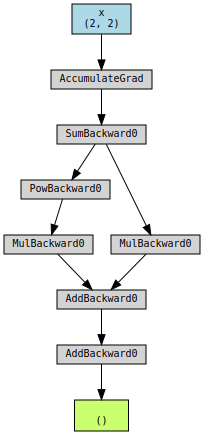

In [ ]:
from torchviz import make_dot

x = torch.ones(2, 2, device=device, requires_grad=True)
x_sum = x.sum()
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * x_sum ** 2 + b * x_sum + c
make_dot(y, params={'x':x})

## autograd()を使った高階微分
* 第一引数は微分される関数
* 第二引数はそれに関して微分する変数
* create_graphをTrueにすると、微分の計算をするだけでなく、計算グラフが作られる
 * すると、高階微分を計算できるようになる。

例1. $y = ax^3 + bx^2 + cx + d$を、$x$について微分

In [ ]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(3.0)
d = torch.tensor(5.0)
y = a * x ** 3 + b * x ** 2 + c * x + d

In [ ]:
dy_dx = torch.autograd.grad(y, x) #単に微分するだけ
print(dy_dx) # 要素が一つだけのtupleになっている

(tensor(3.),)


例2. $y=x_1 x_2$を、$x_1$と$x_2$それぞれについて偏微分

In [ ]:
x1 = torch.tensor(3.0, requires_grad=True)
x2 = torch.tensor(4.0, requires_grad=True)
y = x1 * x2

In [ ]:
dy_dx = torch.autograd.grad(y, (x1, x2)) # 単に微分するだけ
print(dy_dx) # 要素が2つのtuple

(tensor(4.), tensor(3.))


例3. $y = ax^3 + bx^2 + cx + d$を、$x$について微分し、さらにそれを$x$で微分する

In [ ]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(3.0)
d = torch.tensor(5.0)
y = a * x ** 3 + b * x ** 2 + c * x + d

In [ ]:
# backpropagationの計算の計算グラフを作らせる
dy_dx = torch.autograd.grad(y, x, create_graph=True) 
print(dy_dx)
print(dy_dx[0])

(tensor(3., grad_fn=<AddBackward0>),)
tensor(3., grad_fn=<AddBackward0>)


In [ ]:
# backpropagationの計算の計算グラフが表す関数をxで微分
d２y_dx2 = torch.autograd.grad(dy_dx, x)
print(d2y_dx2)
print(d2y_dx2[0])

(tensor(-4.),)
tensor(-4.)


### 多変数関数の偏微分とヘシアン

例. $y=(x_1+3x_2)^2$のヘシアンを求める

In [ ]:
def func(x1, x2):
  return (x1 + 3 * x2) ** 2

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y = func(x1, x2)

In [ ]:
dy_dx1, dy_dx2 = torch.autograd.grad(y, [x1, x2], create_graph=True)
print(dy_dx1.data, dy_dx2.data)

tensor(14.) tensor(42.)


In [ ]:
d2y_dx1dx1, d2y_dx1dx2 = torch.autograd.grad(dy_dx1, [x1, x2], retain_graph=True)
print(d2y_dx1dx1.data, d2y_dx1dx2.data)

tensor(2.) tensor(6.)


In [ ]:
d2y_dx2dx1, d2y_dx2dx2 = torch.autograd.grad(dy_dx2, [x1, x2])
print(d2y_dx2dx1.data, d2y_dx2dx2.data)

tensor(6.) tensor(18.)


In [ ]:
# 答え合わせ
print(torch.autograd.functional.hessian(func, inputs=(x1, x2)))

((tensor(2.), tensor(6.)), (tensor(6.), tensor(18.)))


## 5. 自動微分を使った制約なし最適化

例. $f(x)=x^2-2x+1$を最小にする$x$を求める

In [ ]:
# 関数の定義
def f(x, a=1.0, b=-2.0, c=1.0):
  return a * x ** 2 + b * x + c

In [ ]:
# テンソルの準備
x = torch.tensor(10.0, requires_grad=True)

# 最適化手法のインスタンスを作る
#   param: どの変数で微分するか
#   lr: 学習率
optimizer = torch.optim.SGD(params=[x], lr=0.1)

In [ ]:
for i in range(1, 101):
  optimizer.zero_grad()
  y = f(x)
  y.backward()
  optimizer.step()
  if i % 5 == 0:
    print(f'iter {i} : f(x) = {y.data:.6f}, x = {x.data:.6f}')

iter 5 : f(x) = 13.589545, x = 3.949120
iter 10 : f(x) = 1.459167, x = 1.966368
iter 15 : f(x) = 0.156677, x = 1.316659
iter 20 : f(x) = 0.016823, x = 1.103763
iter 25 : f(x) = 0.001806, x = 1.034001
iter 30 : f(x) = 0.000194, x = 1.011142
iter 35 : f(x) = 0.000021, x = 1.003651
iter 40 : f(x) = 0.000002, x = 1.001196
iter 45 : f(x) = 0.000000, x = 1.000392
iter 50 : f(x) = 0.000000, x = 1.000128
iter 55 : f(x) = 0.000000, x = 1.000042
iter 60 : f(x) = 0.000000, x = 1.000014
iter 65 : f(x) = 0.000000, x = 1.000005
iter 70 : f(x) = 0.000000, x = 1.000001
iter 75 : f(x) = 0.000000, x = 1.000000
iter 80 : f(x) = 0.000000, x = 1.000000
iter 85 : f(x) = 0.000000, x = 1.000000
iter 90 : f(x) = 0.000000, x = 1.000000
iter 95 : f(x) = 0.000000, x = 1.000000
iter 100 : f(x) = 0.000000, x = 1.000000


# 課題4
関数$f(x_1,x_2)=x_1^2+x_2^2$の最小値と、$f(x_1,x_2)$がその最小値をとるときの$x_1$と$x_2$の値を、PyTorchの自動微分を使って求めよう。